In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #PIL stands for Python Imaging Library
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


Data Augmentation

In [ ]:
!pip install Augmentor

In [ ]:
import sys
import Augmentor

p= Augmentor.Pipeline("/content/drive/MyDrive/Agriculture Vision Dataset/All Images/Img labels/cloud_shadow")
p.flip_left_right(0.7)
p.rotate(0.3, 5,5)
p.flip_top_bottom(0.3)
p.zoom_random(0.4, percentage_area=0.5)
p.skew(0.2,0.5)
p.sample(2000)

Executing Pipeline:   0%|          | 0/2000 [00:00<?, ? Samples/s]

Initialised with 769 image(s) found.
Output directory set to /content/drive/MyDrive/Agriculture Vision Dataset/All Images/Img labels/cloud_shadow/output.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7F3A3785C610>: 100%|██████████| 2000/2000 [01:55<00:00, 17.29 Samples/s]


In [ ]:
p= Augmentor.Pipeline("/content/drive/MyDrive/Agriculture Vision Dataset/All Images/Img labels/standing_water")
p.flip_left_right(0.7)
p.rotate(0.3, 5,5)
p.flip_top_bottom(0.3)
p.zoom_random(0.4, percentage_area=0.5)
p.skew(0.2,0.5)
p.sample(2000)

Executing Pipeline:   0%|          | 0/2000 [00:00<?, ? Samples/s]

Initialised with 830 image(s) found.
Output directory set to /content/drive/MyDrive/Agriculture Vision Dataset/All Images/Img labels/standing_water/output.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7F3A85650E50>: 100%|██████████| 2000/2000 [02:00<00:00, 16.61 Samples/s]


In [ ]:
p= Augmentor.Pipeline("/content/drive/MyDrive/Agriculture Vision Dataset/All Images/Img labels/weed_cluster")
p.flip_left_right(0.7)
p.rotate(0.3, 5,5)
p.flip_top_bottom(0.3)
p.zoom_random(0.4, percentage_area=0.5)
p.skew(0.2,0.5)
p.sample(2000)

Executing Pipeline:   0%|          | 0/2000 [00:00<?, ? Samples/s]

Initialised with 1740 image(s) found.
Output directory set to /content/drive/MyDrive/Agriculture Vision Dataset/All Images/Img labels/weed_cluster/output.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7F3A373F9410>: 100%|██████████| 2000/2000 [01:56<00:00, 17.14 Samples/s]


In [ ]:
p= Augmentor.Pipeline("/content/drive/MyDrive/Agriculture Vision Dataset/All Images/Img labels/waterway")
p.flip_left_right(0.7)
p.rotate(0.3, 5,5)
p.flip_top_bottom(0.3)
p.zoom_random(0.4, percentage_area=0.5)
p.skew(0.2,0.5)
p.sample(2000)

Executing Pipeline:   0%|          | 0/2000 [00:00<?, ? Samples/s]

Initialised with 808 image(s) found.
Output directory set to /content/drive/MyDrive/Agriculture Vision Dataset/All Images/Img labels/waterway/output.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7F3A80146850>: 100%|██████████| 2000/2000 [02:01<00:00, 16.41 Samples/s]


Splitting Dataset

In [ ]:
image_size=(512,512)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Agriculture Vision Dataset/New Augmented",
    validation_split=0.1,
    subset="training",
    seed=456,
    image_size=image_size,
    batch_size=32,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Agriculture Vision Dataset/New Augmented",
    validation_split=0.1,
    subset="validation",
    seed=456,
    image_size=image_size,
    batch_size=32,
)

Found 8000 files belonging to 4 classes.
Using 7200 files for training.
Found 8000 files belonging to 4 classes.
Using 800 files for validation.


Experiment 1

Using Adam Optimizer

In [ ]:
num_classes = 4

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(512, 512, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


10 Epochs

In [ ]:
epochs=10
h1 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
225/225 [==============================] - 68s 298ms/step - loss: 2.5044 - accuracy: 0.4217 - val_loss: 1.0188 - val_accuracy: 0.5612
Epoch 2/10
225/225 [==============================] - 68s 299ms/step - loss: 0.9417 - accuracy: 0.6068 - val_loss: 0.8558 - val_accuracy: 0.6600
Epoch 3/10
225/225 [==============================] - 68s 297ms/step - loss: 0.8130 - accuracy: 0.6716 - val_loss: 0.7591 - val_accuracy: 0.7100
Epoch 4/10
225/225 [==============================] - 67s 296ms/step - loss: 0.7127 - accuracy: 0.7211 - val_loss: 0.7838 - val_accuracy: 0.6963
Epoch 5/10
225/225 [==============================] - 68s 300ms/step - loss: 0.6445 - accuracy: 0.7586 - val_loss: 0.7825 - val_accuracy: 0.6938
Epoch 6/10
225/225 [==============================] - 68s 298ms/step - loss: 0.5266 - accuracy: 0.8067 - val_loss: 0.8457 - val_accuracy: 0.6900
Epoch 7/10
225/225 [==============================] - 67s 295ms/step - loss: 0.4093 - accuracy: 0.8500 - val_loss: 0.9125 - val_ac

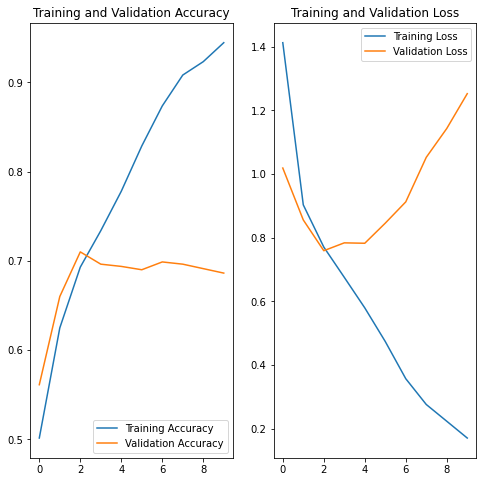

In [ ]:
acc = h1.history['accuracy']
val_acc = h1.history['val_accuracy']

loss = h1.history['loss']
val_loss = h1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

20 Epochs

In [ ]:
epochs=20
h1 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
225/225 [==============================] - 67s 294ms/step - loss: 3.0707 - accuracy: 0.3633 - val_loss: 1.1518 - val_accuracy: 0.4563
Epoch 2/20
225/225 [==============================] - 67s 296ms/step - loss: 1.0182 - accuracy: 0.5730 - val_loss: 0.8892 - val_accuracy: 0.6250
Epoch 3/20
225/225 [==============================] - 68s 295ms/step - loss: 0.9057 - accuracy: 0.6348 - val_loss: 0.8131 - val_accuracy: 0.6837
Epoch 4/20
225/225 [==============================] - 68s 296ms/step - loss: 0.7676 - accuracy: 0.6953 - val_loss: 0.7841 - val_accuracy: 0.6862
Epoch 5/20
225/225 [==============================] - 68s 297ms/step - loss: 0.6764 - accuracy: 0.7357 - val_loss: 0.7269 - val_accuracy: 0.7075
Epoch 6/20
225/225 [==============================] - 68s 298ms/step - loss: 0.5892 - accuracy: 0.7693 - val_loss: 0.8437 - val_accuracy: 0.6675
Epoch 7/20
225/225 [==============================] - 67s 295ms/step - loss: 0.4999 - accuracy: 0.8159 - val_loss: 0.8804 - val_ac

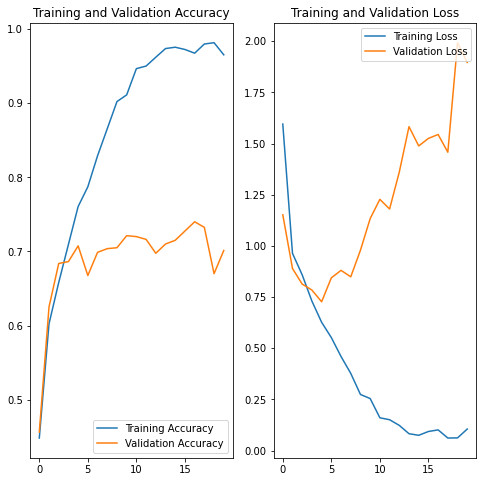

In [ ]:
acc = h1.history['accuracy']
val_acc = h1.history['val_accuracy']

loss = h1.history['loss']
val_loss = h1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Using SGD Optimizer

Epochs = 10

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
h1 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
169/169 [==============================] - 160s 900ms/step - loss: 2.9371 - accuracy: 0.2014 - val_loss: 1.6179 - val_accuracy: 0.3375
Epoch 2/10
169/169 [==============================] - 149s 864ms/step - loss: 1.5894 - accuracy: 0.3457 - val_loss: 1.4386 - val_accuracy: 0.4325
Epoch 3/10
169/169 [==============================] - 148s 865ms/step - loss: 1.2722 - accuracy: 0.5033 - val_loss: 1.5544 - val_accuracy: 0.4508
Epoch 4/10
169/169 [==============================] - 147s 858ms/step - loss: 1.0726 - accuracy: 0.5877 - val_loss: 1.8353 - val_accuracy: 0.4933
Epoch 5/10
169/169 [==============================] - 147s 858ms/step - loss: 0.9523 - accuracy: 0.6343 - val_loss: 1.7831 - val_accuracy: 0.4875
Epoch 6/10
169/169 [==============================] - 147s 858ms/step - loss: 0.8153 - accuracy: 0.6967 - val_loss: 2.0082 - val_accuracy: 0.5142
Epoch 7/10
169/169 [==============================] - 148s 861ms/step - loss: 0.6016 - accuracy: 0.7889 - val_loss: 2.4511 -

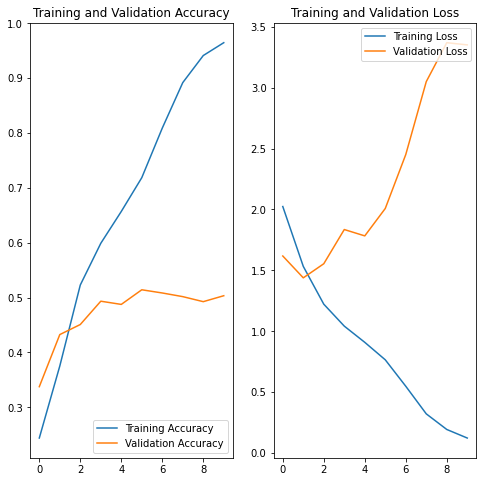

In [ ]:
acc = h1.history['accuracy']
val_acc = h1.history['val_accuracy']

loss = h1.history['loss']
val_loss = h1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epochs = 20

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=20
h1 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
282/282 [==============================] - 85s 296ms/step - loss: 2.9679 - accuracy: 0.3064 - val_loss: 1.3454 - val_accuracy: 0.4660
Epoch 2/20
282/282 [==============================] - 84s 293ms/step - loss: 1.2767 - accuracy: 0.4854 - val_loss: 1.1998 - val_accuracy: 0.5130
Epoch 3/20
282/282 [==============================] - 83s 293ms/step - loss: 1.1409 - accuracy: 0.5541 - val_loss: 1.1540 - val_accuracy: 0.5440
Epoch 4/20
282/282 [==============================] - 83s 292ms/step - loss: 1.0287 - accuracy: 0.6019 - val_loss: 1.1245 - val_accuracy: 0.5740
Epoch 5/20
282/282 [==============================] - 83s 292ms/step - loss: 0.9187 - accuracy: 0.6482 - val_loss: 1.0574 - val_accuracy: 0.5810
Epoch 6/20
282/282 [==============================] - 83s 292ms/step - loss: 0.8344 - accuracy: 0.6850 - val_loss: 1.0581 - val_accuracy: 0.6100
Epoch 7/20
282/282 [==============================] - 83s 293ms/step - loss: 0.7671 - accuracy: 0.7095 - val_loss: 1.0915 - val_ac

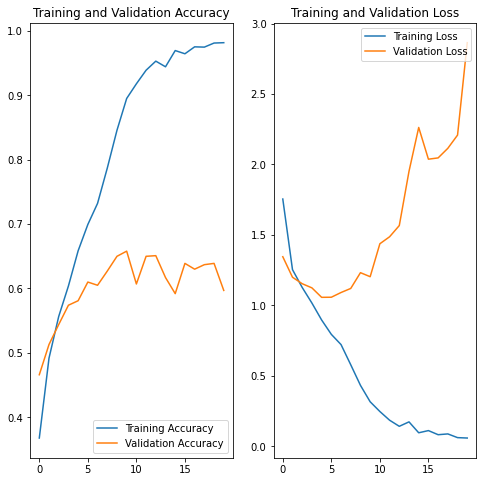

In [ ]:
acc = h1.history['accuracy']
val_acc = h1.history['val_accuracy']

loss = h1.history['loss']
val_loss = h1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

VGG16

Experiment 1

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

ip=layers.Input(shape=(512, 512, 3))
base_model = VGG16(input_tensor = ip,  # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = "/content/drive/MyDrive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
classes = 4, pooling = 'avg') 

In [ ]:
output = layers.Dense(4, activation='softmax')(base_model.output)
model = tf.keras.models.Model(base_model.input, output)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
vgghist = model.fit(train_ds, validation_data = val_ds, steps_per_epoch = 10, epochs = 10)

Epoch 1/10
10/10 [==============================] - 64s 6s/step - loss: 98.5583 - accuracy: 0.1261 - val_loss: 1.7918 - val_accuracy: 0.1683
Epoch 2/10
10/10 [==============================] - 59s 6s/step - loss: 1.7918 - accuracy: 0.1347 - val_loss: 1.7918 - val_accuracy: 0.1683
Epoch 3/10
10/10 [==============================] - 59s 6s/step - loss: 1.7918 - accuracy: 0.1640 - val_loss: 1.7918 - val_accuracy: 0.1683
Epoch 4/10
10/10 [==============================] - 59s 6s/step - loss: 1.7918 - accuracy: 0.1718 - val_loss: 1.7918 - val_accuracy: 0.1683
Epoch 5/10
10/10 [==============================] - 59s 6s/step - loss: 1.7918 - accuracy: 0.1773 - val_loss: 1.7918 - val_accuracy: 0.1683
Epoch 6/10
10/10 [==============================] - 59s 6s/step - loss: 1.7918 - accuracy: 0.1549 - val_loss: 1.7918 - val_accuracy: 0.1683
Epoch 7/10
10/10 [==============================] - 59s 6s/step - loss: 1.7918 - accuracy: 0.1775 - val_loss: 1.7918 - val_accuracy: 0.1683
Epoch 8/10
10/10 [=

Experiment 2 

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Agriculture Vision Dataset/New Augmented",
    image_size=(224,224),
    validation_split=0.1,
    subset="training",
    seed=123,
    batch_size=16,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Agriculture Vision Dataset/New Augmented",
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(224,224),
    batch_size=16,
)

num_classes = 4

base_model = VGG16(include_top=False,
                  input_shape = (224,224,3),
                  weights = None)
for layer in base_model.layers[:-8]:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)


Found 8000 files belonging to 4 classes.
Using 7200 files for training.
Found 8000 files belonging to 4 classes.
Using 800 files for validation.
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f9c90292a90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9c5411ca90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9ca2aaff50> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9c424f5a10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9c4fa949d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9ca134a810> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9ca134a890> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9c42502d10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9ca2449ad0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9ca131c610> False
<te

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D,GlobalAveragePooling2D

model = Sequential()
model.add(base_model)
# model.add(GlobalAveragePooling2D())
model.add(Flatten())
# model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.summary()



Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_62 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 4)               

Using SGD optimizer

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

vgghist = model.fit(train_ds, validation_data = val_ds, steps_per_epoch = 20, epochs = 20)

Epoch 1/20
20/20 [==============================] - 9s 416ms/step - loss: 1.4308 - accuracy: 0.2541 - val_loss: 1.3847 - val_accuracy: 0.2800
Epoch 2/20
20/20 [==============================] - 8s 409ms/step - loss: 1.3947 - accuracy: 0.2460 - val_loss: 1.3826 - val_accuracy: 0.2500
Epoch 3/20
20/20 [==============================] - 8s 408ms/step - loss: 1.4005 - accuracy: 0.2644 - val_loss: 1.3806 - val_accuracy: 0.2637
Epoch 4/20
20/20 [==============================] - 8s 409ms/step - loss: 1.3876 - accuracy: 0.2688 - val_loss: 1.3791 - val_accuracy: 0.2512
Epoch 5/20
20/20 [==============================] - 8s 408ms/step - loss: 1.4133 - accuracy: 0.1929 - val_loss: 1.3815 - val_accuracy: 0.2488
Epoch 6/20
20/20 [==============================] - 8s 403ms/step - loss: 1.3723 - accuracy: 0.2904 - val_loss: 1.3756 - val_accuracy: 0.3187
Epoch 7/20
20/20 [==============================] - 8s 405ms/step - loss: 1.3917 - accuracy: 0.2531 - val_loss: 1.3746 - val_accuracy: 0.2663
Epoch 

Using Adam Optimizer

In [ ]:
# opt = tf.keras.optimizers.SGD(learning_rate=0.0001,momentum = 0.5)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

vgghist = model.fit(train_ds, validation_data = val_ds, steps_per_epoch = 20, epochs = 20)

Epoch 1/20
20/20 [==============================] - 9s 412ms/step - loss: 1.4486 - accuracy: 0.2704 - val_loss: 1.3644 - val_accuracy: 0.2950
Epoch 2/20
20/20 [==============================] - 8s 403ms/step - loss: 1.3481 - accuracy: 0.3083 - val_loss: 1.2786 - val_accuracy: 0.3850
Epoch 3/20
20/20 [==============================] - 8s 403ms/step - loss: 1.3538 - accuracy: 0.2886 - val_loss: 1.3268 - val_accuracy: 0.3237
Epoch 4/20
20/20 [==============================] - 8s 406ms/step - loss: 1.3485 - accuracy: 0.3115 - val_loss: 1.2451 - val_accuracy: 0.4150
Epoch 5/20
20/20 [==============================] - 8s 405ms/step - loss: 1.2800 - accuracy: 0.3897 - val_loss: 1.2824 - val_accuracy: 0.3363
Epoch 6/20
20/20 [==============================] - 8s 403ms/step - loss: 1.2657 - accuracy: 0.3903 - val_loss: 1.2715 - val_accuracy: 0.4288
Epoch 7/20
20/20 [==============================] - 8s 405ms/step - loss: 1.2462 - accuracy: 0.4577 - val_loss: 1.2027 - val_accuracy: 0.3862
Epoch 

Experiment 3

Using Image size (224,224)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Agriculture Vision Dataset/New Augmented",
    image_size=(224,224),
    validation_split=0.1,
    subset="training",
    seed=123,
    batch_size=32,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Agriculture Vision Dataset/New Augmented",
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(224,224),
    batch_size=32,
)

num_classes = 4

base_model = VGG16(include_top=False,
                  input_shape = (224,224,3),
                  weights = None)
for layer in base_model.layers[:-12]:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)


Found 8000 files belonging to 4 classes.
Using 7200 files for training.
Found 8000 files belonging to 4 classes.
Using 800 files for validation.
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f9c90387fd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9c4f99d510> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9c9046edd0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9c4c4cdf50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9c4c519cd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9c4c23dd10> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9c4c208d10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9c4c212350> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9c4c59d550> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9c4fa35310> True
<tenso

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D,GlobalAveragePooling2D

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(6,activation='relu'))
model.summary()



In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

vgghist = model.fit(train_ds, validation_data = val_ds, steps_per_epoch = 10, epochs = 20)

Epoch 1/20
10/10 [==============================] - 10s 908ms/step - loss: 1.7939 - accuracy: 0.2191 - val_loss: 1.7674 - val_accuracy: 0.2438
Epoch 2/20
10/10 [==============================] - 8s 893ms/step - loss: 1.7601 - accuracy: 0.2309 - val_loss: 1.7110 - val_accuracy: 0.2438
Epoch 3/20
10/10 [==============================] - 8s 895ms/step - loss: 1.7012 - accuracy: 0.2616 - val_loss: 1.6885 - val_accuracy: 0.2488
Epoch 4/20
10/10 [==============================] - 9s 915ms/step - loss: 1.5832 - accuracy: 0.2775 - val_loss: 1.6606 - val_accuracy: 0.3262
Epoch 5/20
10/10 [==============================] - 9s 909ms/step - loss: 1.6830 - accuracy: 0.3111 - val_loss: 1.6355 - val_accuracy: 0.3025
Epoch 6/20
10/10 [==============================] - 8s 903ms/step - loss: 1.6255 - accuracy: 0.3306 - val_loss: 1.7347 - val_accuracy: 0.3550
Epoch 7/20
10/10 [==============================] - 8s 894ms/step - loss: 1.7603 - accuracy: 0.3282 - val_loss: 1.7009 - val_accuracy: 0.3225
Epoch

Using Image Size (512,512)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

vgghist = model.fit(train_ds, validation_data = val_ds, steps_per_epoch = 10, epochs = 20)

Epoch 1/20
10/10 [==============================] - 35s 4s/step - loss: 375.6192 - accuracy: 0.2718 - val_loss: 1.7777 - val_accuracy: 0.2713
Epoch 2/20
10/10 [==============================] - 32s 3s/step - loss: 1.8545 - accuracy: 0.2469 - val_loss: 1.7666 - val_accuracy: 0.2438
Epoch 3/20
10/10 [==============================] - 32s 3s/step - loss: 1.7869 - accuracy: 0.2388 - val_loss: 1.7768 - val_accuracy: 0.2713
Epoch 4/20
10/10 [==============================] - 32s 3s/step - loss: 1.7778 - accuracy: 0.2612 - val_loss: 1.7336 - val_accuracy: 0.2713
Epoch 5/20
10/10 [==============================] - 32s 3s/step - loss: 1.7430 - accuracy: 0.2873 - val_loss: 1.7393 - val_accuracy: 0.3512
Epoch 6/20
10/10 [==============================] - 32s 3s/step - loss: 1.7314 - accuracy: 0.3291 - val_loss: 1.7486 - val_accuracy: 0.3200
Epoch 7/20
10/10 [==============================] - 32s 3s/step - loss: 1.7582 - accuracy: 0.2585 - val_loss: 1.7479 - val_accuracy: 0.2713
Epoch 8/20
10/10 [